In [ ]:
import gensim

In [ ]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-300')

[=================================================-] 98.3% 369.8/376.1MB downloaded


In [ ]:
import gensim.downloader
gensim.downloader.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [ ]:
wv['pelecaniformes']

In [ ]:
import pickle
with open('/content/feature_list_as_pkl','rb') as f:
  image_features = pickle.load(f)

In [ ]:
! pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

 99% 650M/656M [00:03<00:00, 178MB/s]
100% 656M/656M [00:03<00:00, 177MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile("/content/animal-image-dataset-90-different-animals.zip") as zip_file:
  zip_file.extractall(path='/content/data')

In [ ]:
import os
animal_class = []
for i in os.listdir('/content/data/animals/animals'):
    animal_class.append(str(i))

In [ ]:
for animal in animal_class:
  try:
    vec = wv[animal]
  except KeyError:
    print(animal)

In [ ]:
animal_class

In [ ]:
#/content/data/animals/animals/bear/039b2ae790.jpg
text_to_image_features = {}
path = '/content/data/animals/animals'
for cls in os.listdir(path):
  text_to_image_features[cls] = []
  vec = wv[cls]
  text_to_image_features[cls].append(vec)
  class_folder_path = path + '/' + cls
  print(class_folder_path)
  images = []
  for image_name in os.listdir(class_folder_path):
    image_path = class_folder_path + '/' + image_name
    print(image_path)
    images.append(image_path)
  text_to_image_features[cls].append(images)

In [ ]:
len(text_to_image_features['tiger'])

2

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
query = 'water'
query_vec = wv[query]
sim = {}
for cls in text_to_image_features:
  vec = text_to_image_features[cls][0]
  val = cosine_similarity(vec.reshape(1,-1), query_vec.reshape(1,-1))
  sim[cls] = val[0][0]
#random.shuffle(text_to_image_features[target_class][1])


In [ ]:
max_sim_cls = max(sim, key = sim.get)
max_sim_cls, sim[max_sim_cls]

('mosquito', 0.29649514)

In [ ]:
import random
output = []
random.shuffle(text_to_image_features[max_sim_cls][1])
for image in text_to_image_features[max_sim_cls][1]:
  if len(output) < 5:
    output.append(image)
  else:
    break
output

['/content/data/animals/animals/turtle/1ad9159795.jpg',
 '/content/data/animals/animals/turtle/0d670c7936.jpg',
 '/content/data/animals/animals/turtle/91fee2727d.jpg',
 '/content/data/animals/animals/turtle/007efdbb03.jpg',
 '/content/data/animals/animals/turtle/5a66a61eba.jpg']

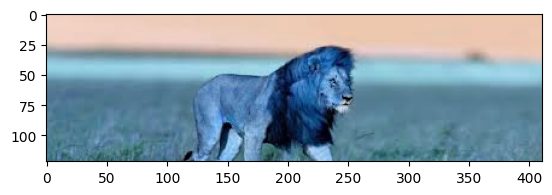

In [ ]:
image = cv2.imread(output[2])
plt.imshow(image)